<a href="https://colab.research.google.com/github/apoorv280/Py_torch-/blob/main/PytorchWorkflow_raw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [146]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
torch.__version__

'2.6.0+cu124'

## pytorch Workflow
Data can be anything
* excel sheets
* images
* text
* audio
* DNA

ML is a game of two parts:
1. Get data into numerical representation.
2. Build models to recognize patterns from data.



In [120]:
# create known parameters
weight = 0.7
bias = 0.3

# create
start = 0
end = 1
step = 0.02

#add extra dimension with unsqueeze
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias

X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

### Splitting data into training and testing.

### Training Validation Testing (Validation not always needed)

In [121]:
#create a train/test split
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)


(40, 40, 10, 10)

### Plotting the data

In [122]:
def plot_pred(train_data = X_train,
              train_labels = y_train,
              test_data = X_test,
              test_labels = y_test,
              predictions = None):
  """
  Plots training and testing data and compare predictions
  """
  plt.figure(figsize=(10,7))

  # plot training in Blue
  plt.scatter(train_data,train_labels, c='b', s=4, label = 'Training data')

  #plot test data into green
  plt.scatter(test_data,test_labels, c='g', s=4, label = "Testing_data")

  #are there any predictions
  if predictions is not None:
    plt.scatter(test_data, predictions, c='r', s=4, label = "Predictions")

  #show Legend
  plt.legend(prop={"size":14})

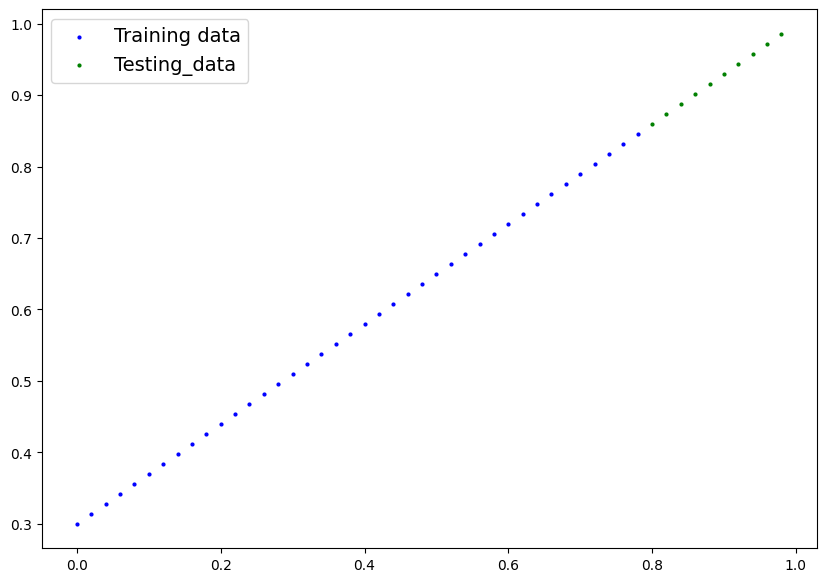

In [123]:
plot_pred();

## Build Model

Our First PyTorch Model
two main algos
1. gradient descent
2. backpropagation

In [136]:
# create a Linear Regression model
class LinearRegressionModel(nn.Module): # everything is inherited from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,requires_grad=True,
                                            dtype=torch.float))
    # if the parameters requires gradient default True
    # start with random values for weights and bias
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True,
                                         dtype=torch.float))

    # forward defines the computation for the model
  def forward(self,x:torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias # regression formula


### pytorch model building essentials

* torch.nn contains all building blocks for computational graphs
* torch.nn.Parameter: what parameters should the model try
* torch.nn.Module: the base class for all NN modules if you subclass it
* torch.optim: it will optimise the PyTorch
* def forward(): all nn.Module subclasses wants a forward function for doing all the calculation

# checking the pytorch model
we've created a model now we can check what's inside the model

In [137]:
# create random seed
torch.manual_seed(42)

# creating an instance of the model

model_0 = LinearRegressionModel()

# check the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

### Making predictions using torch.inference_model()

check predictions based on ytest and check it with X_test


In [138]:
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds
# inference_mode(): switch off the gradient track and updating model

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

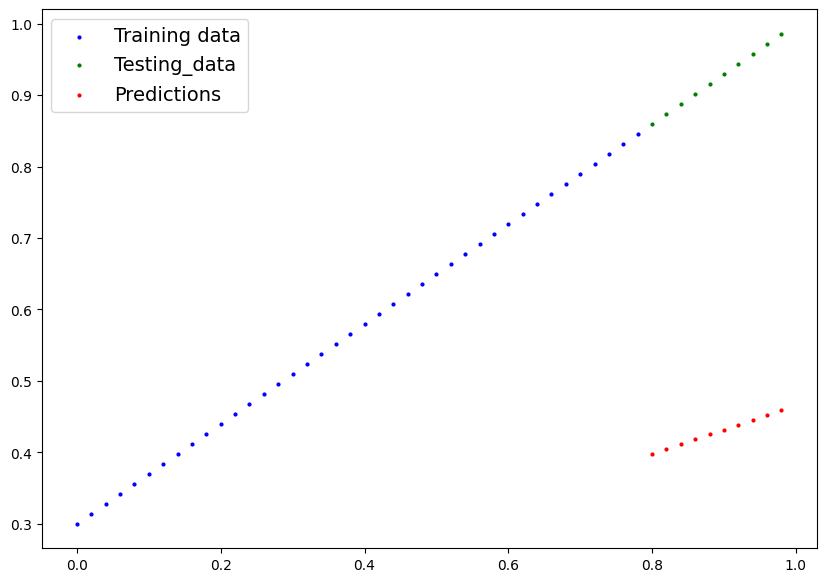

In [139]:
plot_pred(predictions=y_preds)

## Train Model

a way to measure the model's predictions is to use Loss function
or cost function or criterion

**Loss Function:** A function to measure how wrong your model's
performance/ predictions are to the ideal outputs, lower the Better

**Optimiser:** takes into account the loss of a model and adjusts the
model's parameters to imporve the loss funtion.

**L1**



In [140]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [141]:
# a parameter is a value that model sets itself
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [142]:
# setup a loss fn
loss_fn = nn.L1Loss()

# setup an optimizer (SGD)
# hyperparameter is a parameter that you can set
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)
# Learning Rate is the most imp hyperparameter that you can set

## Building a Training Loop

In [143]:
torch.manual_seed(42)
epochs = 200 # this is a hyperparameter coz we set it ourself
epoch_counts = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
  #set the model to training mode
  model_0.train()

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. calculate the loss
  loss = loss_fn(y_pred,y_train)
  #print(f'Loss: {loss}')

  # 3. optimiser
  optimizer.zero_grad()

  # 4. Perform backpropagation  on the loss with respect to the parameters of the model
  loss.backward()

  # 5. step the optimizer perform GD
  optimizer.step()

  # Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. forward pass
    test_pred = model_0(X_test)

    # 2. calculate the loss of test
    test_loss = loss_fn(test_pred, y_test)

  # Print Loss
  if epoch % 10 == 0:
    epoch_counts.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")
    print(model_0.state_dict())



  # print out model state_dict()
  #print(model_0.state_dict())

# print(f'Loss: {loss}')
# print(model_0.state_dict())

Epoch: 0 | Loss: 0.31288138031959534 | Test Loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | Test Loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | Test Loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | Test Loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | Test Loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | Test Loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | Test Loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

In [144]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

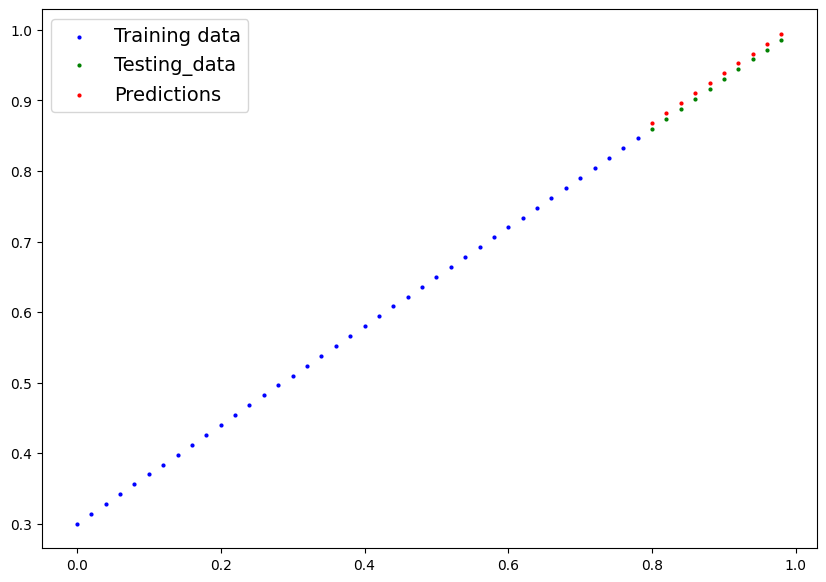

In [145]:
plot_pred(predictions = y_preds_new)

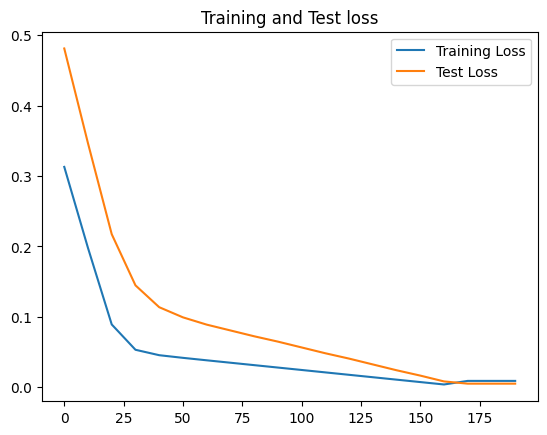

In [151]:
plt.plot(epoch_counts,np.array(torch.tensor(loss_values).numpy()), label = "Training Loss")
plt.plot(epoch_counts,test_loss_values, label = "Test Loss")
plt.title("Training and Test loss")
plt.legend()